# Random forest cross-validation

Run cross validation by station (leave-one out)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneGroupOut

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [3]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(0, 221)

In [4]:
dat2 = dat2.groupby('site')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


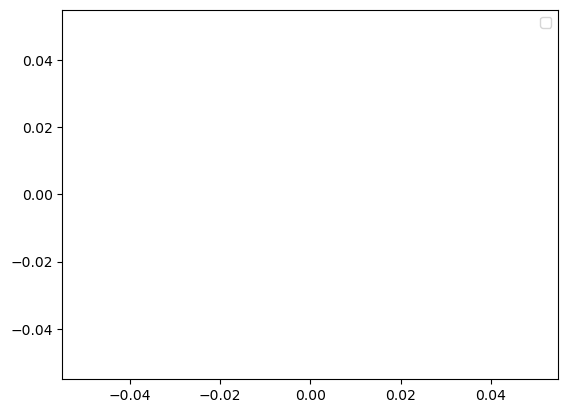

In [5]:
# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in dat2:
    ax.plot(group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [6]:
X = dat.iloc[:, 1:218]
y = dat['y']
groups = dat['site']
logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)

8

In [7]:
mygrps = groups.unique()
n_grps = len(mygrps)

## Cross-validation loop

In [8]:
my_mae = np.empty(n_grps)
my_y_true = []
my_y_pred = []

In [9]:
for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"Site {mygrps[i]}:")
    #print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")

    # Split out data
    X_train = X.iloc[train_index, :]
    print(X_train.shape)
    y_train = y[train_index]
    n_feat = X_train.shape[1]
    
    X_test = X.iloc[test_index, :]
    print(X_test.shape)
    y_test = y[test_index]

    # Build model
    aq_rf = ensemble.RandomForestRegressor()

    # Train model
    aq_rf.fit(X_train, y_train)
    
    ## Predict for test set
    y_test_pred = aq_rf.predict(X_test)
    my_mae[i] = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE: {my_mae[i]}")
    
    my_y_true.append(y_test.to_numpy())
    my_y_pred.append(y_test_pred)


Fold 0:
Site 2005:
(1002, 217)
(142, 217)
MAE: 0.005772746478873237
Fold 1:
Site 3006:
(1001, 217)
(143, 217)
MAE: 0.005423776223776228
Fold 2:
Site 3010:
(1001, 217)
(143, 217)
MAE: 0.003349020979020975
Fold 3:
Site 3013:
(1000, 217)
(144, 217)
MAE: 0.011538472222222228
Fold 4:
Site 3014:
(1000, 217)
(144, 217)
MAE: 0.005476527777777785
Fold 5:
Site 3015:
(1000, 217)
(144, 217)
MAE: 0.0032246527777777833
Fold 6:
Site 3016:
(1003, 217)
(141, 217)
MAE: 0.005029858156028368
Fold 7:
Site 4002:
(1001, 217)
(143, 217)
MAE: 0.004660139860139856


In [10]:
print(my_mae)
print(np.mean(my_mae))

[0.00577275 0.00542378 0.00334902 0.01153847 0.00547653 0.00322465
 0.00502986 0.00466014]
0.005559399309452057


In [11]:
my_y_pred

[array([0.02762, 0.02887, 0.03088, 0.03191, 0.03031, 0.03389, 0.03388,
        0.03413, 0.03483, 0.03541, 0.03506, 0.03555, 0.03452, 0.03475,
        0.03535, 0.03572, 0.03556, 0.03375, 0.03241, 0.02862, 0.0192 ,
        0.01898, 0.01561, 0.01219, 0.0121 , 0.01239, 0.01261, 0.01517,
        0.01747, 0.01809, 0.0186 , 0.02218, 0.02581, 0.02868, 0.02977,
        0.03106, 0.03261, 0.03311, 0.03266, 0.03169, 0.03165, 0.03106,
        0.03058, 0.03077, 0.03098, 0.03101, 0.03061, 0.03057, 0.02993,
        0.03039, 0.03027, 0.03005, 0.02997, 0.0293 , 0.0276 , 0.02599,
        0.02115, 0.02099, 0.02247, 0.02822, 0.02795, 0.02652, 0.02581,
        0.02815, 0.02945, 0.02987, 0.03326, 0.03195, 0.02917, 0.02265,
        0.02139, 0.01972, 0.02322, 0.02514, 0.02201, 0.0232 , 0.03074,
        0.02958, 0.02365, 0.0197 , 0.01974, 0.02414, 0.02895, 0.02964,
        0.03006, 0.03199, 0.03038, 0.02704, 0.02224, 0.02039, 0.0189 ,
        0.02058, 0.02023, 0.01839, 0.01905, 0.02007, 0.02353, 0.02478,
      

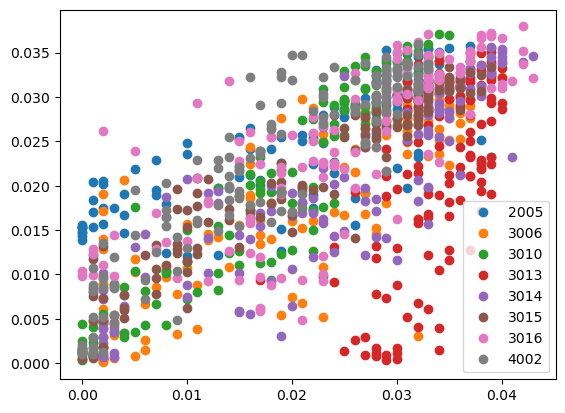

In [12]:
plt.figure()
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], my_y_pred[i], 'o', label = mygrps[i])

plt.legend()
plt.show()

In [13]:
mygrps

array([2005, 3006, 3010, 3013, 3014, 3015, 3016, 4002])

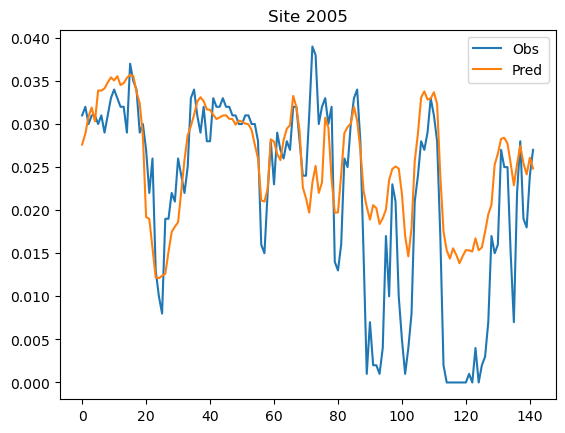

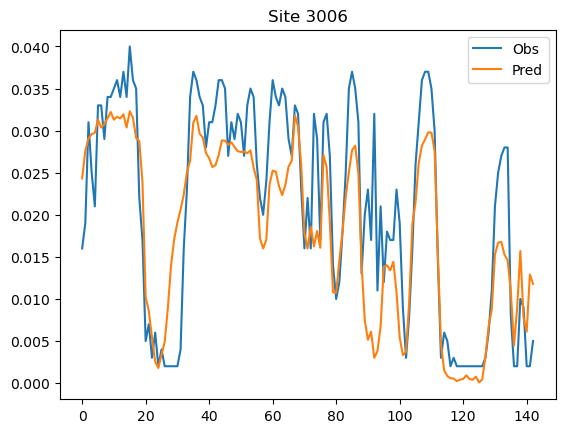

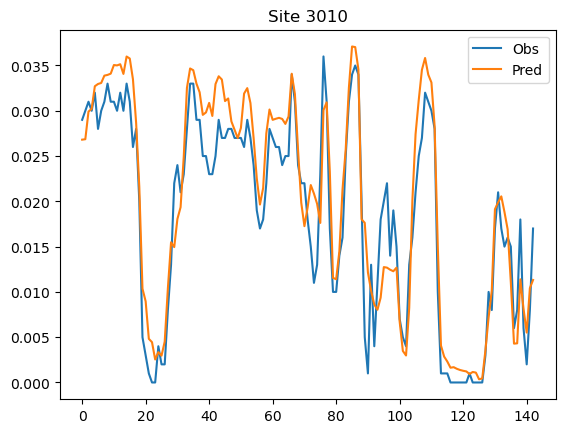

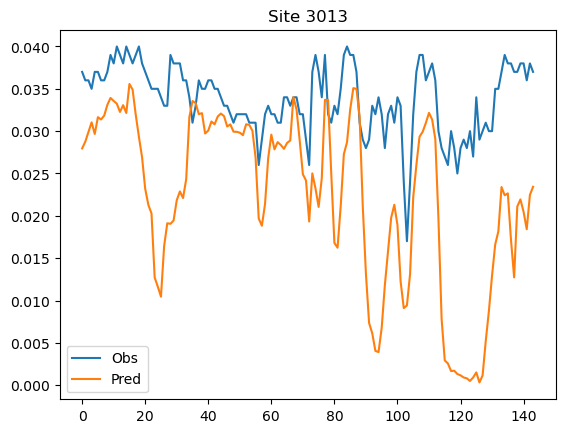

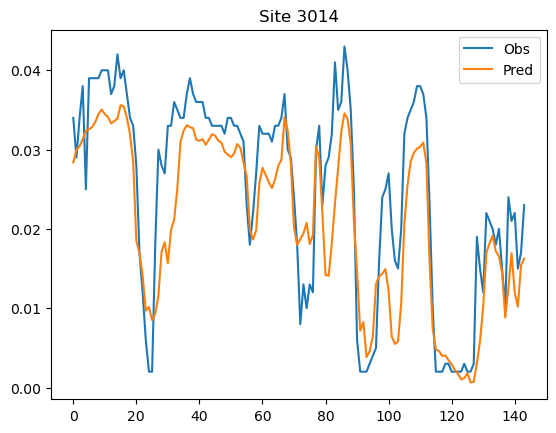

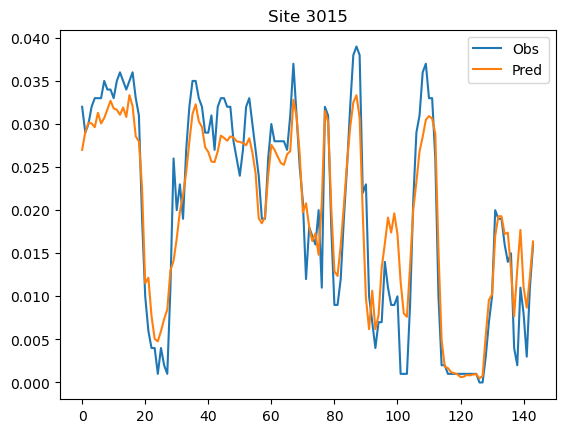

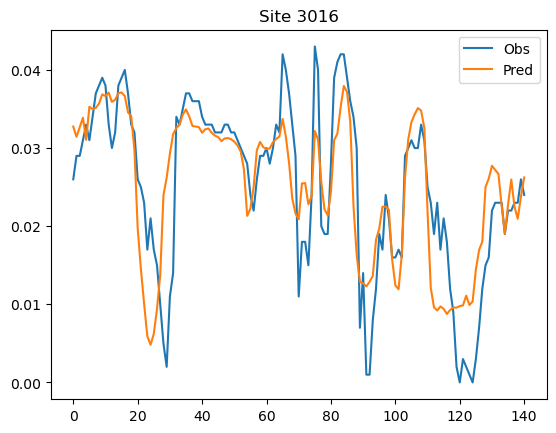

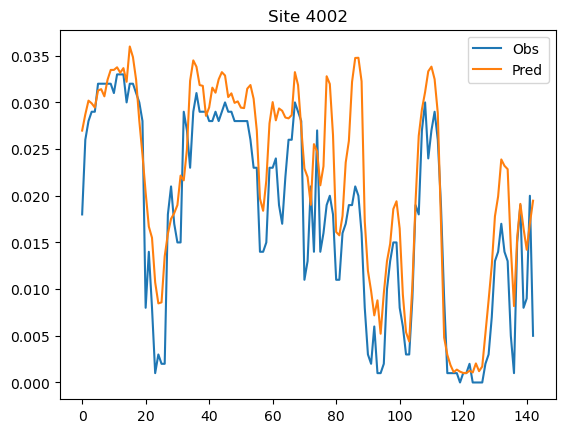

In [14]:
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], label = "Obs")
    plt.plot(my_y_pred[i], label = "Pred")
    plt.title("Site " + mygrps[i].astype('str'))
    plt.legend()
    plt.show()